# **Level 2 : Task 1**
Task: Restaurant Ratings

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px


In [ ]:
data_og=pd.read_csv("/content/Dataset .csv")
data=data_og.copy()
data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


1.Analyze the distribution of aggregate
ratings and determine the most common
rating range.



In [ ]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

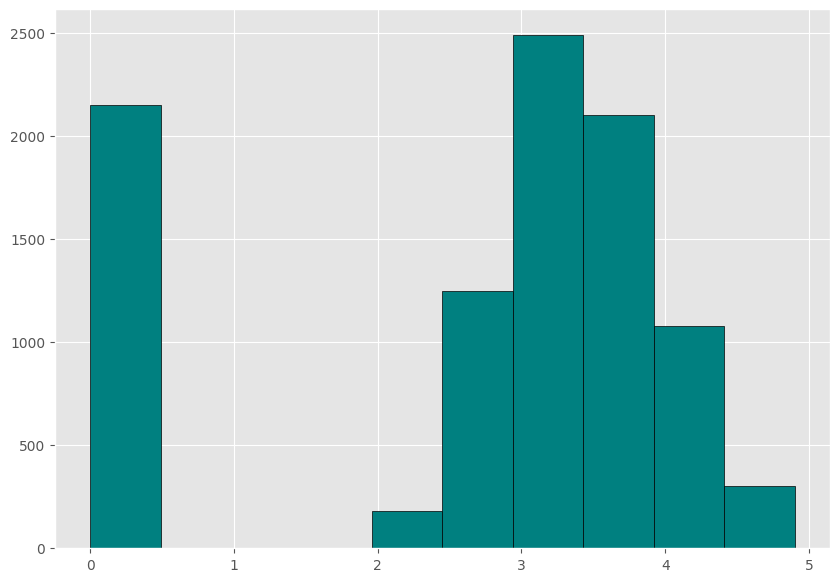

In [ ]:

xdata=data['Aggregate rating']
plt.figure(figsize=(10,7))
plt.hist(xdata,bins=10,color='teal', edgecolor='black')
plt.style.use('ggplot')
plt.show()

2.Calculate the average number of votes
received by restaurants.

In [ ]:
data["Votes"].mean()

156.909747670401

# **Level 2 : Task 2**
Task: Cuisine Combination



Identify the most common combinations of
cuisines in the dataset.



In [ ]:
p=data["Cuisines"].value_counts()
p.head(20)

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
South Indian                      112
Bakery, Fast Food                 108
Chinese, North Indian             105
Mughlai                           103
Ice Cream, Desserts                83
Ice Cream                          74
North Indian, Fast Food            74
Name: Cuisines, dtype: int64

Determine if certain cuisine combinations
tend to have higher ratings.

In [ ]:
ss=data[["Cuisines","Aggregate rating"]]
sorted_vals=ss.sort_values("Aggregate rating",ascending=False)
sorted_vals

,Cuisines,Aggregate rating
1381,"Mexican, American, Healthy Food",4.9
589,"Continental, Indian",4.9
374,"Burger, Bar Food, Steak",4.9
9303,Desserts,4.9
9299,Desserts,4.9
...,...,...
4034,North Indian,0.0
4033,Kashmiri,0.0
4029,"Chinese, Fast Food",0.0
4025,"Ice Cream, Desserts",0.0


# **Level 2 : Task 3**
Task: Geographic Analysis



Plot the locations of restaurants on a
map using longitude and latitude
coordinates.



In [ ]:
data[["Latitude","Longitude"]]

In [ ]:
fig = px.scatter_mapbox(
    data,
    lat="Latitude",
    lon="Longitude",
    hover_name="Restaurant Name",
    zoom=10,
)

fig.update_layout(
    mapbox_style="open-street-map",
    margin=dict(l=0, r=0, t=0, b=0),
)

fig.show()

Identify any patterns or clusters of
restaurants in specific areas.

In [ ]:
data.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


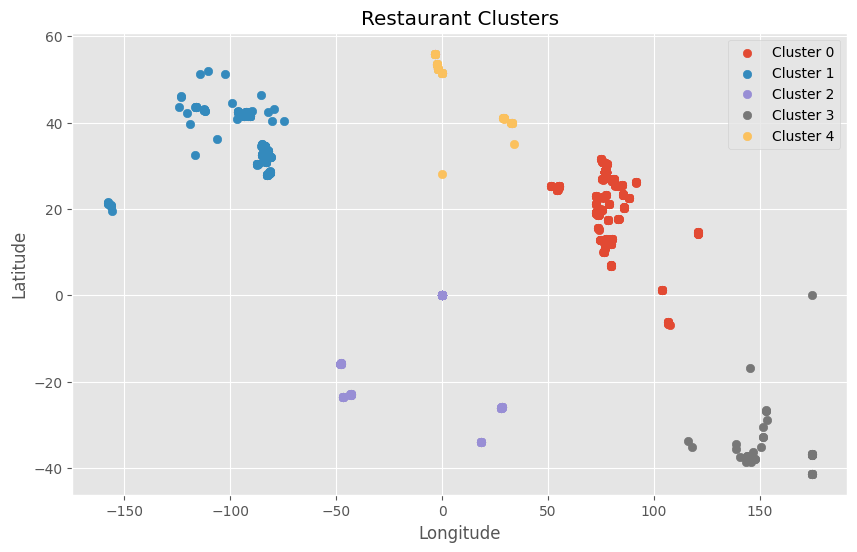

In [ ]:
from sklearn.cluster import KMeans


coordinates = data[['Latitude', 'Longitude']]


num_clusters =5

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(coordinates)


plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}')

plt.title('Restaurant Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

1. cluster 0 lies in : latitude -5 to 35 and longitude 50 to 130
2. cluster 1 lies in : latitude  20 to  56 and longitude -160 to -70
3. cluster 2 lies in : latitude -39 to 0 and longitude -50 to 49
4. cluster 3 lies in : latitude -41 to 0 and longitude 120 to 170
5. cluster 4 lies in : latitude 25 to 59 and longitude 0 to 40

**Latitude Ranges:**

Cluster 0 and Cluster 3: Both clusters have latitude ranges that overlap (-5 to 35 for Cluster 0 and -41 to 0 for Cluster 3). There might be similarities in the types of restaurants or dining experiences in these latitude ranges.

**Longitude Ranges:**

Cluster 0 and Cluster 3: While their latitude ranges overlap, Cluster 0 is denser in the longitude range 50 to 100, whereas Cluster 3 is denser in the longitude range 120 to 170. This suggests potential regional variations in restaurant concentrations.

**Longitude Density:**

Cluster 0 and Cluster 1: Cluster 0 is denser in the eastern part of its specified longitude range (50 to 100), while Cluster 1 is denser at the western end (25 to 30). This indicates an east-west distinction in restaurant density.

**Proximity to Cluster 0:**

Cluster 3 and Cluster 4: Both clusters have points scattered far away, but they are mentioned to be closer to Cluster 0. This might suggest some level of similarity or connection between these clusters.

**Scattered Distribution:**

Cluster 2 and Cluster 4: Both clusters are described as having points scattered far away, indicating a more dispersed distribution of restaurants. This could suggest that these clusters cover a broader geographical area with less concentration.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

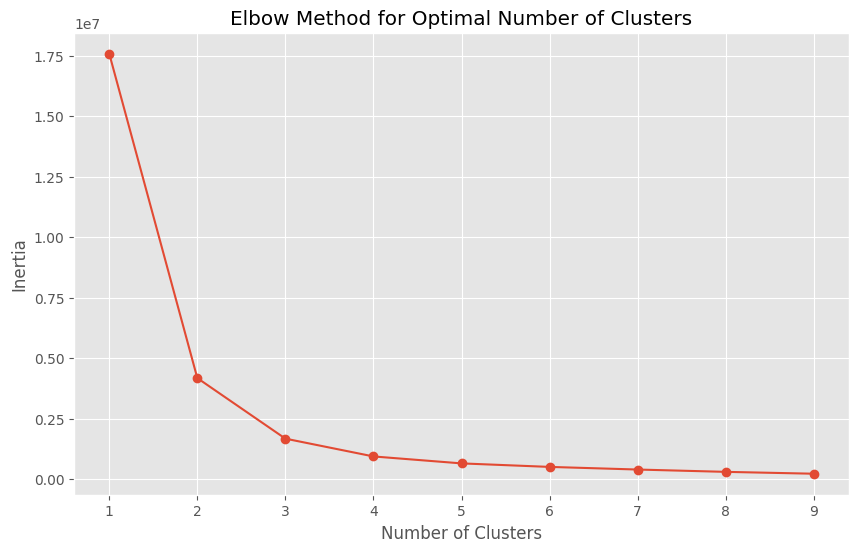

In [ ]:
#for getting the optimal cluster count, usually selected when the graph decreases and forms a elbow

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


coordinates = data[['Latitude', 'Longitude']]

cluster_range = range(1, 10)
inertia_values = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(coordinates)
    inertia_values.append(kmeans.inertia_)

#elbow curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


# **Level 2 : Task 4**
Task: Restaurant Chains

Identify if there are any restaurant chains
present in the dataset.

In [ ]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cluster'],
      dtype='object')

In [ ]:
chain_by_city = data.groupby(['City', 'Restaurant Name']).size()


restaurant_chains_by_city = chain_by_city[chain_by_city > 1].index.get_level_values('Restaurant Name').tolist()

print("Restaurant Chains by city:")
restaurant_chains_by_city



Restaurant Chains by city:


['D�_vero��lu',
 'Timboo Cafe',
 "Rhinehart's Oyster Bar",
 'Onesta',
 'Bake N Shake',
 'Manohar Dairy And Restaurant',
 'Coco Bambu',
 'Palmshore',
 'Los Agaves',
 "AB's Absolute Barbecues",
 'Frontier',
 "Giani's",
 'Green Chick Chop',
 'Momo-Cha',
 'Perfect Bake',
 'Sanjha Chulha',
 'Shree Bikaner Misthan Bhandar',
 'Shree Rathnam',
 'Subway',
 'The Chaiwalas',
 "The Fisherman's Wharf",
 "Ammu's South Indian Restaurant",
 'Apni Rasoi',
 'Au Bon Pain',
 'Bakers Oven',
 'Barista',
 'Baskin Robbins',
 'Behrouz Biryani',
 'Bikaner Sweets',
 'Bikaner Sweets & Restaurant',
 'Bikanervala',
 'Biryani Art',
 'Burger Hut',
 'Burger King',
 'Burger Point',
 'Burger Xpress',
 'Cafe Coffee Day',
 'Cake 24x7',
 'Cake Point',
 'Captain Bill$ Deliverz',
 'Chaayos',
 'Chai Point',
 "Chawla's�_",
 'Coldpress Company',
 'Costa Coffee',
 'Crudo Juicery',
 'Crust N Cakes',
 'Dabba Meat',
 'Delight Express',
 'Dilli Light',
 'Dilli Rasoi',
 "Domino's Pizza",
 'Doughlicious',
 'Drifters Cafe',
 "Dunkin' D

Analyze the ratings and popularity of
different restaurant chains.

In [ ]:
popular_resto=data[data["Restaurant Name"].isin(restaurant_chains_by_city)]

rating_and_popularity =popular_resto[["Restaurant Name","Votes","Aggregate rating"]]
rating_and_popularity.sort_values(["Aggregate rating","Votes"], ascending=False)

,Restaurant Name,Votes,Aggregate rating
2414,Barbeque Nation,5966,4.9
2307,AB's - Absolute Barbecues,5434,4.9
3013,Naturals Ice Cream,2620,4.9
9296,Talaga Sampireun,2212,4.9
2409,Barbeque Nation,1753,4.9
...,...,...,...
8900,Chinese Food Corner,0,0.0
8934,Twenty Four Seven,0,0.0
8978,Bake Walkers,0,0.0
8997,Kake Da Dhaba,0,0.0


# END